# 📘 New Things I Learned in This Notebook

## 📊 Data Visualization  
- **`sns.countplot()`** → Used to visualize categorical data counts.  
- **`sns.barplot()`** → Displays categorical data using bars with summary statistics.  
- **`plt.pie()`** → Creates a pie chart to show proportions.  

## 🔢 Data Encoding Methods  
- **Label Encoding** → Converts categorical values into numerical labels.  
- **One-Hot Encoding** → Creates binary columns for each category.  
- **Ordinal Encoding** → Assigns ordered numerical values to categories.  

## 📂 Kaggle Notebook  
- Learned how to **upload a dataset** and use it in the notebook.  

---

✍ *These techniques helped me analyze and visualize categorical data effectively!*  


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing/Housing_.csv
/kaggle/input/houses-dataset/Housing.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/housing/Housing_.csv
/kaggle/input/houses-dataset/Housing.csv


# READING DATA

In [3]:
df = pd.read_csv('/kaggle/input/houses-dataset/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
261,4473000,3510,3,1,2,yes,no,no,no,no,0,no,semi-furnished
487,2870000,5400,4,1,2,yes,no,no,no,no,0,no,unfurnished
359,3710000,3600,3,1,1,yes,no,no,no,no,1,no,unfurnished
146,5600000,10500,2,1,1,yes,no,no,no,no,1,no,semi-furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
325,4007500,3460,4,1,2,yes,no,no,no,yes,0,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
341,3850000,3180,2,2,1,yes,no,yes,no,no,2,no,semi-furnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
430,3290000,2500,2,1,1,no,no,no,no,yes,0,no,unfurnished


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

# Null valuies


In [9]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
df.duplicated().sum()

0

# Data visualization

In [12]:
bedroom_count = df['bedrooms'].value_counts()
bedroom_count

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

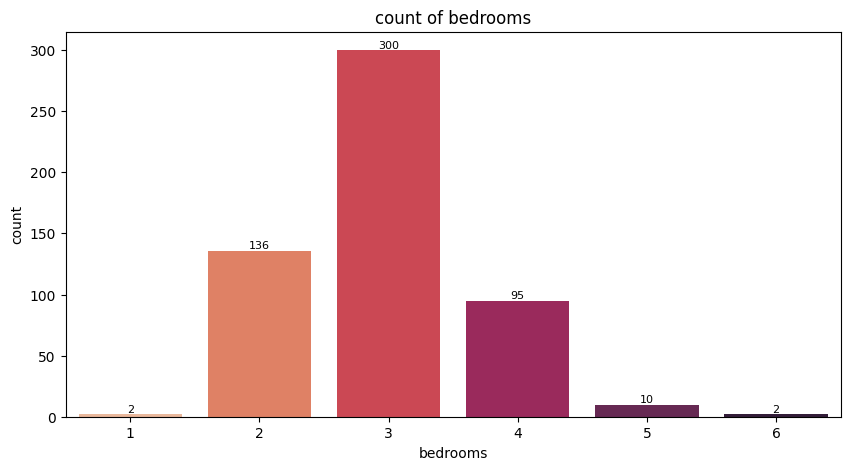

In [13]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=bedroom_count.index, y=bedroom_count.values,palette="rocket_r")
ax.bar_label(ax.containers[0], fontsize=8);
plt.title('count of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('count')
plt.show()

In [14]:
bathrooms = df['bathrooms'].value_counts()
bathrooms

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

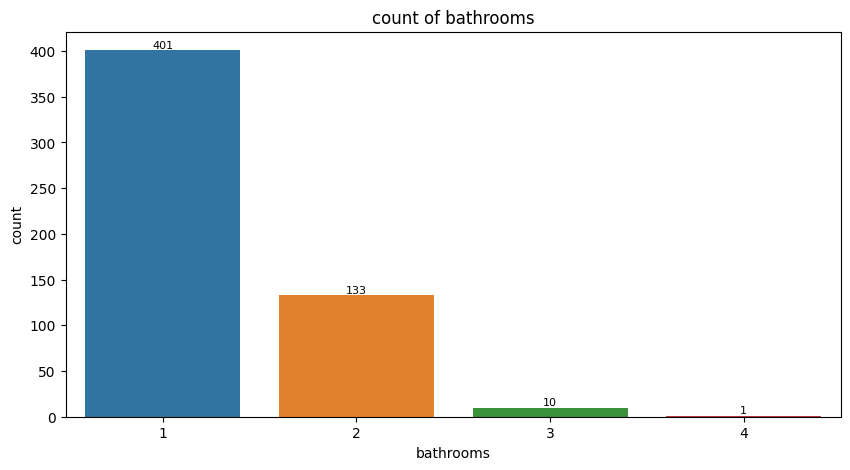

In [15]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = bathrooms.index , y = bathrooms.values )
ax.bar_label(ax.containers[0] ,fontsize = 8)
plt.title('count of bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('count')
plt.show()

In [16]:
stories_count = df['stories'].value_counts()
stories_count

stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64

Text(0, 0.5, 'Stories')

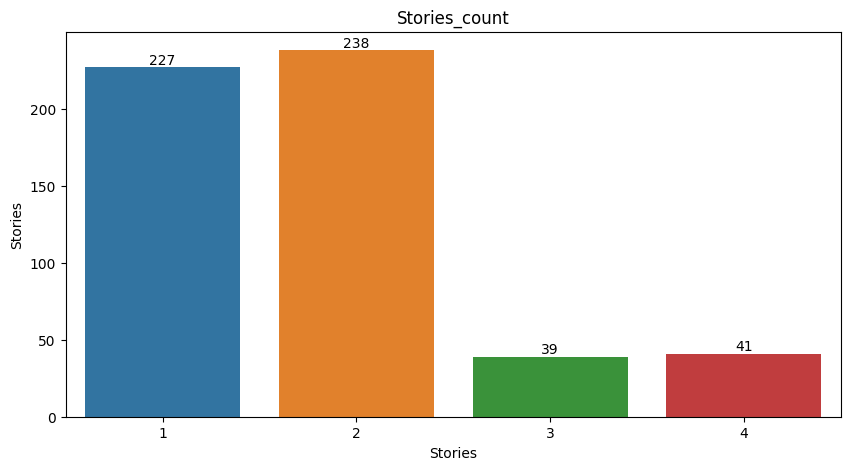

In [17]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = stories_count.index , y = stories_count.values)
ax.bar_label(ax.containers[0] , fontsize = 10)
plt.title('Stories_count')
plt.xlabel('Stories')
plt.ylabel('Stories')


In [18]:
mainroad_count = df['mainroad'].value_counts()
mainroad_count

mainroad
yes    468
no      77
Name: count, dtype: int64

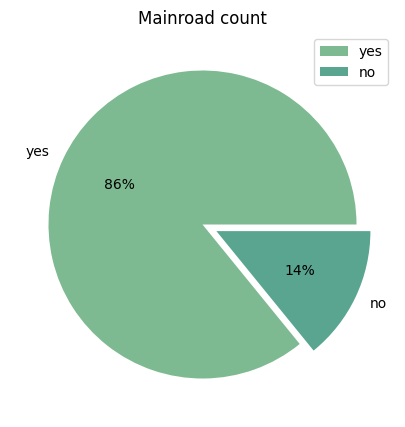

In [19]:
plt.figure(figsize = (10,5))
plt.pie(mainroad_count.values, labels = mainroad_count.index  ,colors = sns.color_palette("crest") , explode= [ 0 , 0.1] , autopct='%.0f%%')
plt.title('Mainroad count')
plt.legend()
plt.show()

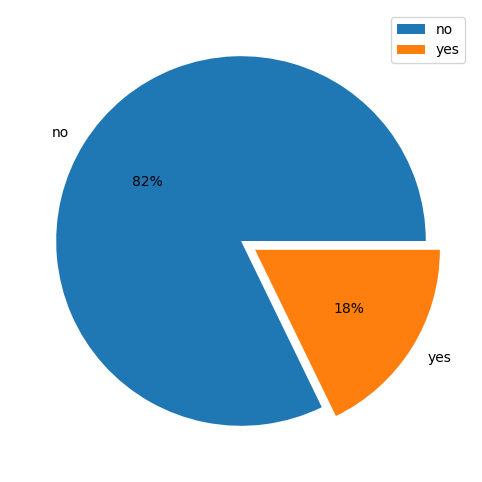

In [20]:
guestroom_count = df['guestroom'].value_counts()
plt.figure(figsize = (10,6))
plt.pie(guestroom_count.values,labels= guestroom_count.index,autopct = '%.0f%%' , explode = [0 , 0.09])
plt.legend()


## Use countplot() when you want Seaborn to count for you.   
 ## Use barplot() when you already have data summarized.

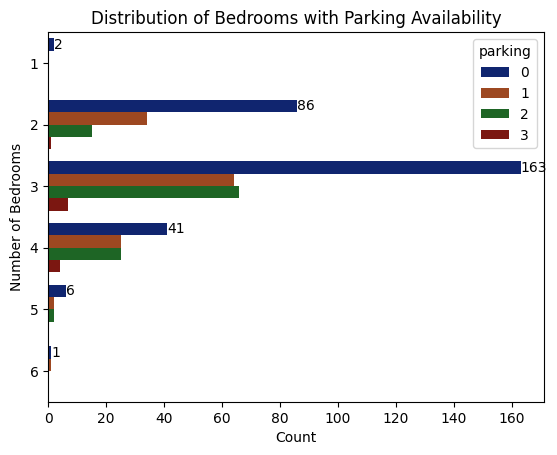

In [21]:
ax = sns.countplot(df, y= 'bedrooms' , hue = 'parking' , palette = 'dark')
ax.bar_label(ax.containers[0])
plt.title("Distribution of Bedrooms with Parking Availability")
plt.xlabel("Count")
plt.ylabel("Number of Bedrooms")
plt.show()


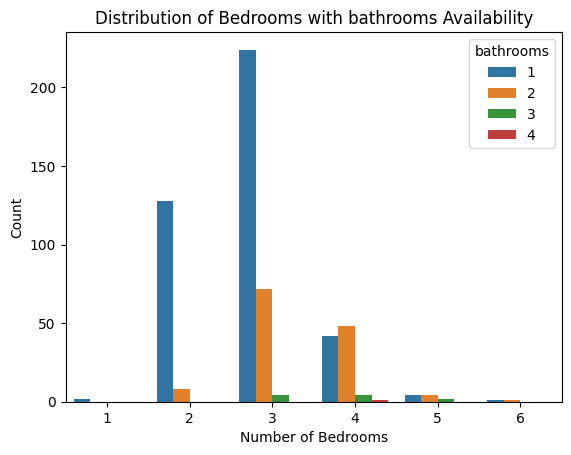

In [22]:
ax = sns.countplot(df, x = 'bedrooms' , hue = 'bathrooms')
ax.bar_labels = ax.containers[0]
plt.title("Distribution of Bedrooms with bathrooms Availability")
plt.ylabel("Count")
plt.xlabel("Number of Bedrooms")
plt.show()


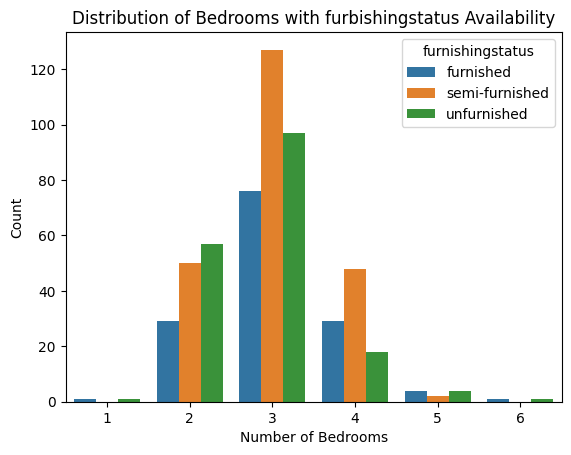

In [23]:
ax = sns.countplot(df ,x = 'bedrooms' , hue = 'furnishingstatus' )
ax.bar_label = ax.containers[0]
plt.title("Distribution of Bedrooms with furbishingstatus Availability")
plt.ylabel("Count")
plt.xlabel("Number of Bedrooms")
plt.show()


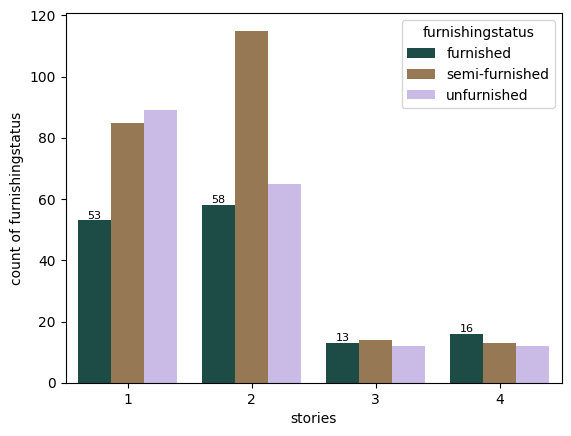

In [24]:
ax = sns.countplot(df, x="stories", hue="furnishingstatus",palette="cubehelix")
ax.bar_label(ax.containers[0], fontsize=8)
plt.ylabel('count of furnishingstatus')
plt.show()

# data encoding


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


| Variable          | Best Encoding Method           | Reason |
|------------------|--------------------------------|-----------------------------------------------|
| furnishingstatus | One-Hot Encoding / Binary Encoding | Nominal with few categories (OHE), but Binary Encoding reduces dimensionality if needed. |
| prefarea         | One-Hot Encoding (yes/no)      | Binary categorical (0/1). Simple and effective. |
| airconditioning  | One-Hot Encoding (yes/no)      | Binary categorical (0/1). No need for other encodings. |
| hotwaterheating  | One-Hot Encoding (yes/no)      | Binary categorical (0/1). Keeps it simple. |
| basement         | One-Hot Encoding (yes/no)      | Binary categorical (0/1). |
| guestroom        | One-Hot Encoding (yes/no)      | Binary categorical (0/1). |
| mainroad        | One-Hot Encoding (yes/no)      | Binary categorical (0/1). |


In [26]:
cat_col = ['furnishingstatus','prefarea','airconditioning','hotwaterheating','basement','guestroom','mainroad']
for col in cat_col :
    print(df[col].value_counts())

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64
prefarea
no     417
yes    128
Name: count, dtype: int64
airconditioning
no     373
yes    172
Name: count, dtype: int64
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
basement
no     354
yes    191
Name: count, dtype: int64
guestroom
no     448
yes     97
Name: count, dtype: int64
mainroad
yes    468
no      77
Name: count, dtype: int64


In [27]:
encoder = OneHotEncoder()

In [28]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoding_col = ['furnishingstatus', 'prefarea', 'airconditioning', 'hotwaterheating', 'basement', 'guestroom', 'mainroad']

encoder = OneHotEncoder(sparse=False)
col_encoding = encoder.fit_transform(df[encoding_col])  

df_encoded = pd.DataFrame(col_encoding, columns=encoder.get_feature_names_out(encoding_col))

df = df.drop(columns=encoding_col).join(df_encoded)


In [29]:
df

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,prefarea_no,...,airconditioning_no,airconditioning_yes,hotwaterheating_no,hotwaterheating_yes,basement_no,basement_yes,guestroom_no,guestroom_yes,mainroad_no,mainroad_yes
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,12250000,9960,3,2,2,2,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,12215000,7500,4,2,2,3,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,11410000,7420,4,1,2,2,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
541,1767150,2400,3,1,1,0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
542,1750000,3620,2,1,1,0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
543,1750000,2910,3,1,1,0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


<Axes: >

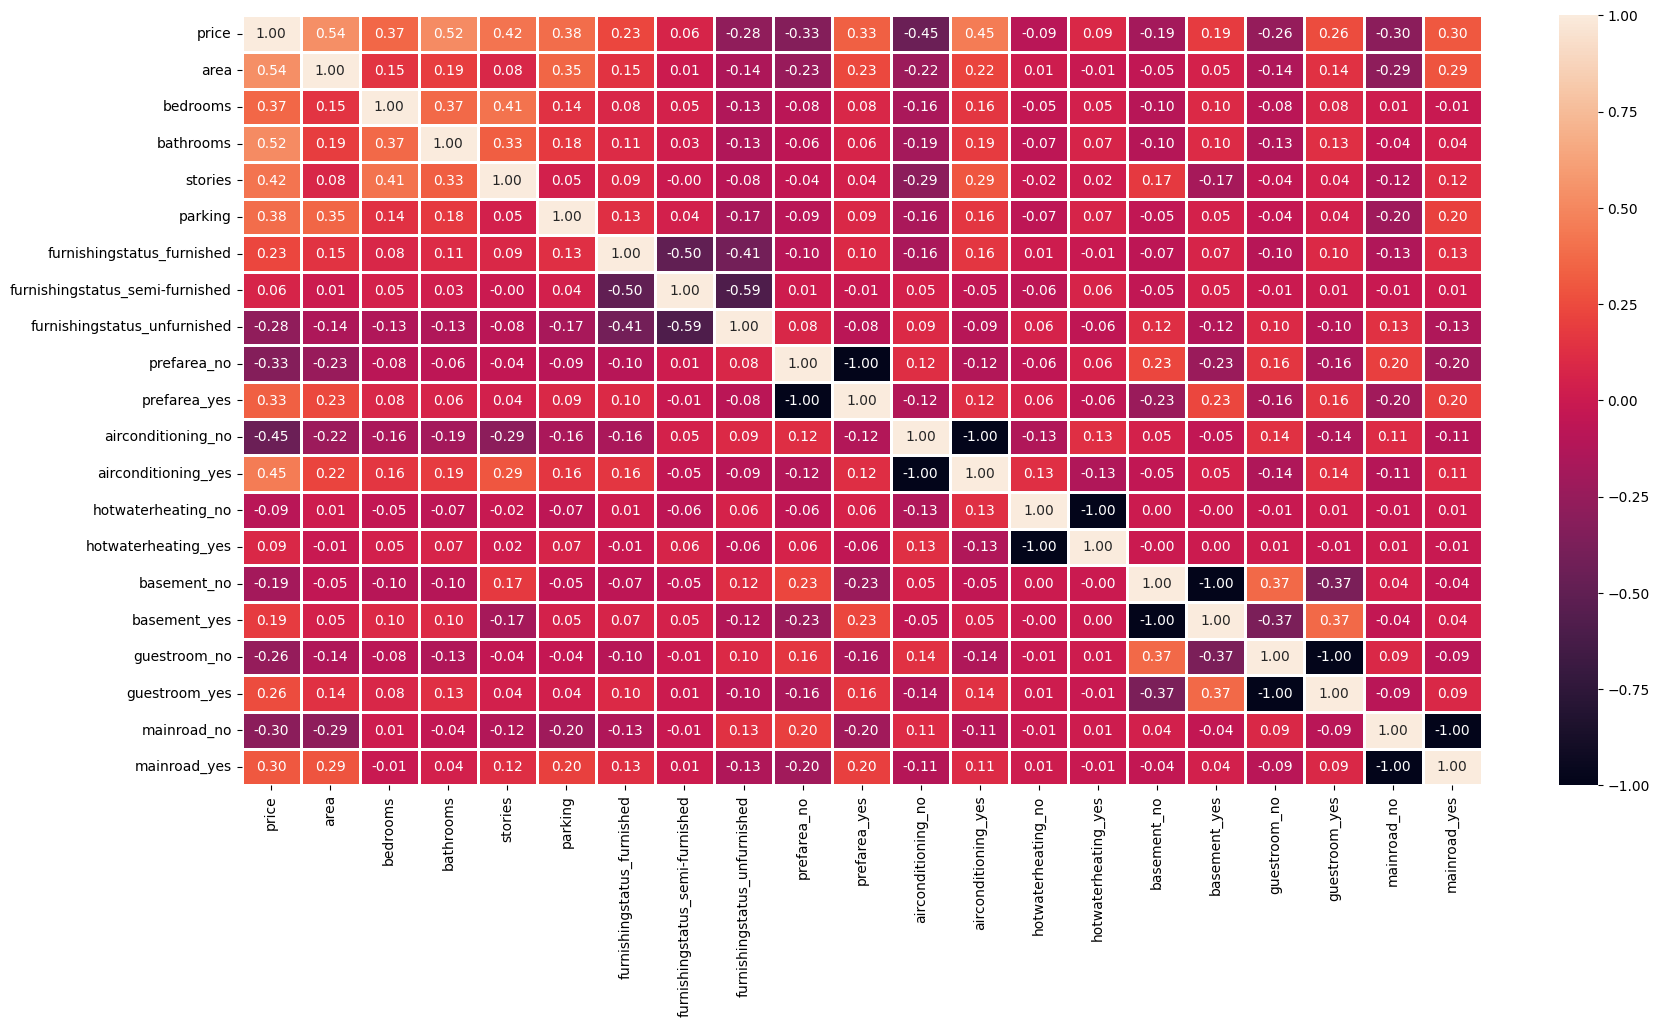

In [30]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot= True , linewidths = 2 ,cbar=True, fmt=".2f")


# feature and target

In [31]:
x = df.drop(columns=['price'],axis=1)
y = df['price']

# data splitting and modeling

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [34]:
ln_acc = r2_score(y_test, y_predict)
ln_acc

NameError: name 'y_predict' is not defined